In [1]:
from distmesh import *
from FEM_TPT import *
import numpy as np
import math
import matplotlib.pyplot as plt
import csv 


In [2]:
# Double-well potential in R^d with spherical sets A and B
# Solves \nabla*(exp(-\beta V)*\nabla q) +((d-2)/r)*exp(-\beta*V)*dq/dr = 0    (*)
# d = dimension of the ambient space
# r = sqrt(x_2^2 + ... x_d^2)
# V = 0.5*(x_1^2-1)^2 + Vpar*0.5*r^2
#
# Sets A and B
# Option 1: balls
# A = {x | (x - [-1,0,...,0])^2 < Ra^2}
# B = {x | (x - [1,0,...,0])^2 < Rb^2}
# 
# Option 2: sublevel sets
# A = {x | V(x) < Va, x < 0}
# B = {x | V(x) < Vb, x > 0}
#
# We multiply equation (*) by r^{d-2} and obtain that (*) is equivalent to
#
# \nabla * [ r^{d-2}exp(-\beta V) \nabla q ] = 0

In [3]:
# problem setup: choose sets A and B and the outer boundary
# set A is the ball with center at (-1,0,0,...,0) and radius Ra
# set B is the ball with center at (1,0,0,...,0) and radius Rb
# parameters for regions A and B
xa=-1
xb=1 
Ra = 0.2 # radius of set A
Rb = 0.2 # radius of set B
Va = 0.2 # 0.1
Vb = 0.2 # 0.1
# if generate_mesh == True, mesh is generated and saves as csv files
# if generate_mesh == False, mesh is downloaded from those csv files
generate_mesh = True
# if mesh_option == 1, A and B are balls
# if mesh_option == 2, A and B are sublevel sets
mesh_option = 2

# the dimension of the ambient space
dim = 10 

beta = 3.0  # 10.0
Vbdry = 2.0 # the boundary of the computational domain # 1.0

# h0 is the desired scalind parameter for the mesh
h0 = 0.02

# V = 0.5*(x_1^2-1)^2 + Vpar*0.5*r^2
Vpar = 0.3
def Pot(xr):
    x = xr[:,0]
    r = xr[:,1]
    return ((x**2-1)**2 + Vpar*r**2) # 0.5*((x**2-1)**2 + Vpar*r**2)
    

Text(0, 0.5, 'r')

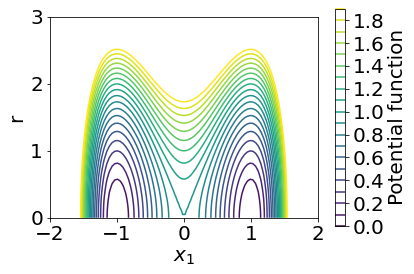

In [4]:
# define the potential on a meshgrid
nx,ny = (100,100)
nxy = nx*ny
xmin = -2.0
xmax = 2.0
ymin = 0
ymax = 3.0
x1 = np.linspace(xmin,xmax,nx)
y1 = np.linspace(ymin,ymax,ny)
x_grid, y_grid = np.meshgrid(x1,y1)
x_vec = np.reshape(x_grid, (nxy,1))
y_vec = np.reshape(y_grid, (nxy,1))
v = np.zeros(nxy)
xy = np.concatenate((x_vec,y_vec),axis=1)
v = Pot(xy)
vmin = np.amin(v)
v_grid = np.reshape(v,(nx,ny))    
# graphics
plt.rcParams.update({'font.size': 20})
ls = plt.contour(x_grid,y_grid,v_grid,np.arange(0,Vbdry,0.1))
plt.colorbar(label="Potential function", orientation="vertical")
axes=plt.gca()
axes.set_aspect(1)
axes.set_xlabel('$x_1$')
axes.set_ylabel('r')

89
89


Text(0, 0.5, 'r')

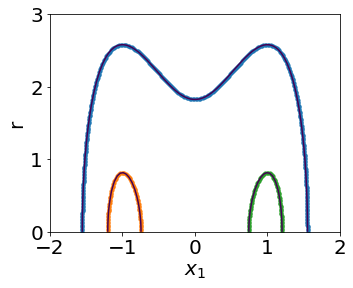

In [5]:
# set sets A and B and the outer boundary
def put_pts_on_arc(xc,yc,r,n):
    # puts points equispaced on the arc [0,pi]
    t = np.linspace(0,math.pi,n+1)
    pts = np.zeros((n,2))
    pts[:,0] = xc+r*np.cos(t[0:n])
    pts[:,1] = yc+r*np.sin(t[0:n])
    return pts

if mesh_option == 1: # A and B are balls
    Na = int(round(math.pi*Ra/h0))
    Nb = int(round(math.pi*Rb/h0))
    ptsA = put_pts_on_arc(xa,0,Ra,Na)
    ptsB = put_pts_on_arc(xb,0,Rb,Nb)
    
if mesh_option == 2: # A and B are sublevel sets
    Adata = plt.contour(x_grid[:,0:50],y_grid[:,0:50],v_grid[:,0:50],[Va]) # need this for the meshing
    for item in Adata.collections:
        for i in item.get_paths():
            ptsA = i.vertices
    ptsA = reparametrization(ptsA,h0);        
    Na = np.size(ptsA,axis=0)
    Bdata = plt.contour(x_grid[:,50:nx],y_grid[:,50:nx],v_grid[:,50:nx],[Vb]) # need this for the meshing
    for item in Bdata.collections:
        for i in item.get_paths():
            ptsB = i.vertices
    ptsB = reparametrization(ptsB,h0);        
    Nb = np.size(ptsB,axis=0)
    print(Na)
    print(Nb)
    with open('2wellHD_ptsA.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(ptsA)
    with open('2wellHD_ptsB.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(ptsB)


# outer boundary
bdrydata = plt.contour(x_grid,y_grid,v_grid,[Vbdry]) # need this for the meshing
for item in bdrydata.collections:
    for i in item.get_paths():
        p_outer = i.vertices
# reparametrize the outer boundary to make the distance 
# between the nearest neighbor points along it approximately h0
pts_outer = reparametrization(p_outer,h0);

Nouter = np.size(pts_outer,axis=0)
Nfix = Na+Nb+Nouter

plt.scatter(pts_outer[:,0],pts_outer[:,1],s=10)
plt.scatter(ptsA[:,0],ptsA[:,1],s=10)
plt.scatter(ptsB[:,0],ptsB[:,1],s=10)
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
axes.set_xlabel('$x_1$')
axes.set_ylabel('r')

count =  200 displacement =  0.008708188812341268
count =  400 displacement =  0.0027874995130659145
count =  600 displacement =  0.007479062174382722
count =  800 displacement =  0.0017167337715642207
Npts =  18229  Ntri =  35765


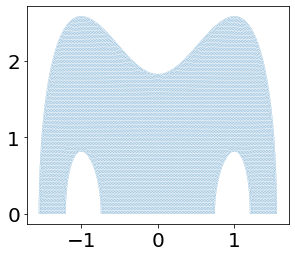

In [6]:
# input data for triangulation
# bbox = [xmin,xmax,ymin,ymax]
if generate_mesh == True:
    bbox = [xmin,xmax,ymin,ymax]
    pfix = np.zeros((Nfix,2))
    pfix[0:Na,:] = ptsA
    pfix[Na:Na+Nb,:] = ptsB
    pfix[Na+Nb:Nfix,:] = pts_outer

    def dfunc(p):
        d0 = Pot(p)
        if mesh_option == 1:
            dA = dcircle(p,xa,0.0,Ra)
            dB = dcircle(p,xb,0.0,Rb)
        if mesh_option == 2:  
            dA = dintersect(d0-Va,p[:,0]) # V < Va and x < 0
            dB = dintersect(d0-Vb,-p[:,0]) # V < Vb and x > 0
        d = dintersect(-p[:,1],ddiff(d0-Vbdry,dunion(dA,dB)))
        return d

    pts,tri = distmesh2D(dfunc,huniform,h0,bbox,pfix)
    with open('2wellHD_pts2.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(pts)

    with open('2wellHD_tri2.csv', 'w', newline='') as file:
        mywriter = csv.writer(file, delimiter=',')
        mywriter.writerows(tri)
else:
    pts = np.loadtxt('2wellHD_pts.csv', delimiter=',', dtype=float)
    tri = np.loadtxt('2wellHD_tri.csv', delimiter=',', dtype=int)

Npts = np.size(pts,axis=0)
Ntri = np.size(tri,axis=0)
print("Npts = ",Npts," Ntri = ",Ntri)    

In [ ]:
# find the mesh points lying on the Dirichlet boundary \partial A \cup \partial B
if mesh_option == 1:
    NAind,Aind = find_ABbdry_pts(pts,xa,0.0,Ra,h0) # find mesh points on \partial A
    NBind,Bind = find_ABbdry_pts(pts,xb,0.0,Rb,h0) # find mesh points on \partial B

if mesh_option == 2:
    A1 = np.argwhere(np.abs(Pot(pts) - Va) < h0*1e-2)
    A1 = A1.flatten()
    A2 = np.argwhere(pts[A1,0] < 0)
    A2 = A2.flatten()
    Aind = A1[A2]
    B1 = np.argwhere(np.abs(Pot(pts) - Vb) < h0*1e-2)
    B1 = B1.flatten()
    B2 = np.argwhere(pts[B1,0] > 0)
    B2 = B2.flatten()
    Bind = B1[B2]
    
# find the committor
def rfac(p):
    return p[:,1]**(dim-2)

q = FEM_committor_solver_cylindrical_symmetry(pts,tri,Aind,Bind,Pot,rfac,beta)

In [ ]:
fname = "2wellHD_committor_ABlevelsets_beta{}_h{}.csv".format(beta, h0)
with open(fname, 'w', newline='') as file:
    mywriter = csv.writer(file, delimiter=',')
    mywriter.writerows(np.reshape(q,(Npts,1)))

# visualize the committor
plt.tricontourf(pts[:,0], pts[:,1],tri,q,np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))
plt.colorbar(label="Committor", orientation="vertical")
axes=plt.gca()
axes.set_aspect(1)
plt.rcParams.update({'font.size': 20})
# plt.savefig('DoubleWell10D_committor.pdf')
axes.set_xlabel('$x_1$')
axes.set_ylabel('r')